# Problem-7: Correspondance Analysis with USArrests dataset using Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import prince

In [2]:
# Step 1: Load USArrests dataset
url = "https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/USArrests.csv"
usarrests = pd.read_csv(url, index_col=0)
print(usarrests.head())

            Murder  Assault  UrbanPop  Rape
rownames                                   
Alabama       13.2      236        58  21.2
Alaska        10.0      263        48  44.5
Arizona        8.1      294        80  31.0
Arkansas       8.8      190        50  19.5
California     9.0      276        91  40.6


In [3]:
# Step 2: Perform Correspondence Analysis (CA) on the USArrests data
ca = prince.CA(n_components=2, n_iter=10, copy=True, check_input=True, random_state=42)
ca = ca.fit(usarrests)

In [4]:
# Step 3: Eigenvalues (explained inertia)
eigenvalues = ca.eigenvalues_
print("Eigenvalues:", eigenvalues)

Eigenvalues: [0.04501357 0.00606546]


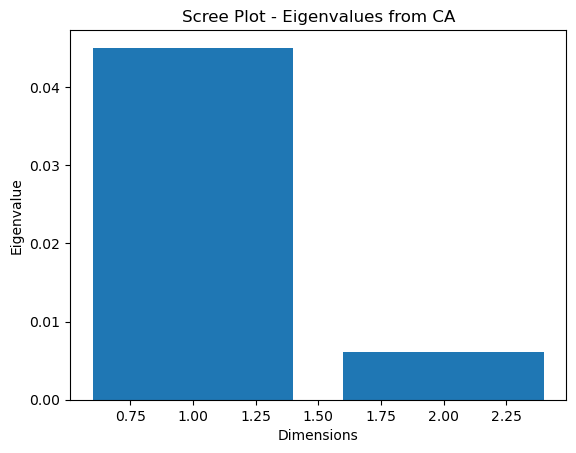

In [5]:
plt.bar(range(1, len(eigenvalues) + 1), eigenvalues)
plt.xlabel("Dimensions")
plt.ylabel("Eigenvalue")
plt.title("Scree Plot - Eigenvalues from CA")
plt.show()


In [6]:
# Step 4: Row and Column coordinates (profiles)
row_coords = ca.row_coordinates(usarrests)
col_coords = ca.column_coordinates(usarrests)

print("\nRow coordinates (first 5 rows):")
print(row_coords.head())

print("\nColumn coordinates:")
print(col_coords)


Row coordinates (first 5 rows):
                   0         1
rownames                      
Alabama    -0.181415  0.024962
Alaska     -0.224989 -0.170053
Arizona    -0.129295  0.019609
Arkansas   -0.149569  0.008356
California -0.047561 -0.057339

Column coordinates:
                 0         1
Murder   -0.151595 -0.085575
Assault  -0.140128  0.021127
UrbanPop  0.354758  0.037788
Rape      0.087510 -0.255170


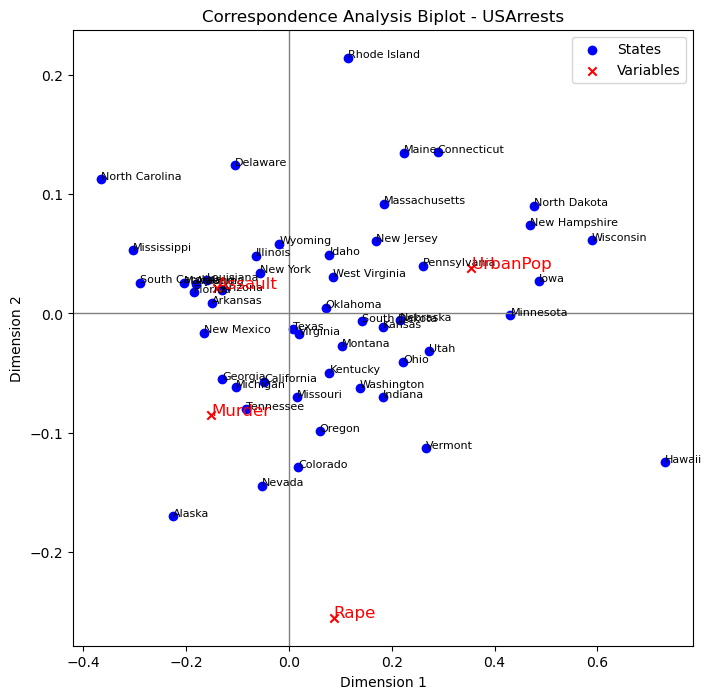

In [7]:
# Step 5: Plot biplot of rows and columns
fig, ax = plt.subplots(figsize=(8, 8))
# Plot rows (states)
ax.scatter(row_coords[0], row_coords[1], c='blue', label='States')
for i, txt in enumerate(row_coords.index):
    ax.annotate(txt, (row_coords.iloc[i, 0], row_coords.iloc[i, 1]), fontsize=8)
# Plot columns (variables)
ax.scatter(col_coords[0], col_coords[1], c='red', marker='x', label='Variables')
for i, txt in enumerate(col_coords.index):
    ax.annotate(txt, (col_coords.iloc[i, 0], col_coords.iloc[i, 1]), fontsize=12, color='red')

ax.axhline(0, color='grey', lw=1)
ax.axvline(0, color='grey', lw=1)
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_title("Correspondence Analysis Biplot - USArrests")
ax.legend()
plt.show()

This biplot from a Correspondence Analysis shows the relationship between states and crime variables in the USArrests dataset.

States (blue circles) and variables (red 'x' marks) that are close to each other on the plot are strongly associated.

For example:

* "UrbanPop" and "Assault" are close to states like Massachusetts and New Jersey, suggesting these states have higher rates of assault and urbanization.

* "Murder" is close to southern states like Georgia, Tennessee, and Louisiana, indicating a higher association with this crime.

* "Rape" is near states like Nevada and Colorado, suggesting a higher association there.

The plot reveals patterns in the data, showing which states are similar to each other and which crimes are more prevalent in specific groups of states.












Tools

